In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
chart = pd.read_pickle('spotify_data/charts_us_daily.pkl')

In [3]:
audio_features = pd.read_pickle('spotify_data/us_audio_features.pkl')

In [20]:
merged = pd.merge(chart, audio_features, how='left', on='uri')

In [21]:
merged

,date,uri,artist_names,track_name,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,2017-01-01,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,"Migos, Lil Uzi Vert",Bad and Boujee (feat. Lil Uzi Vert),1371493,0.0611,0.926,343150,0.666,0.000000,11,0.1230,-5.314,1,0.2440,127.079,4,0.168
1,2017-01-01,spotify:track:343YBumqHu19cGoGARUTsd,Drake,Fake Love,1180074,0.1050,0.928,210937,0.481,0.000000,9,0.1760,-9.350,0,0.2870,134.007,4,0.613
2,2017-01-01,spotify:track:5aAx2yezTd8zXrkmtKl66Z,"The Weeknd, Daft Punk",Starboy,1064351,0.1650,0.681,230453,0.594,0.000003,7,0.1340,-7.028,1,0.2820,186.054,4,0.535
3,2017-01-01,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey",Closer,1010492,0.4140,0.748,244960,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661
4,2017-01-01,spotify:track:6fujklziTHa8uoM5OQSfIo,"Rae Sremmurd, Gucci Mane",Black Beatles,874289,0.1420,0.794,291893,0.632,0.000000,0,0.1280,-6.163,1,0.0649,145.926,4,0.355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437379,2022-12-27,spotify:track:18vXApRmJSgQ6wG2ll9AOg,Polo G,RAPSTAR,248361,0.4100,0.789,165926,0.536,0.000000,6,0.1290,-6.862,1,0.2420,81.039,4,0.437
437380,2022-12-27,spotify:track:01Lr5YepbgjXAWR9iOEyH1,Chief Keef,Love Sosa,248312,0.0361,0.772,246213,0.413,0.000000,0,0.1110,-8.193,0,0.0890,131.965,4,0.211
437381,2022-12-27,spotify:track:6PGoSes0D9eUDeeAafB2As,"Kendrick Lamar, Zacari",LOVE. FEAT. ZACARI.,247369,0.2640,0.800,213400,0.585,0.000000,10,0.1530,-7.343,1,0.0924,126.058,4,0.779
437382,2022-12-27,spotify:track:2i2qDe3dnTl6maUE31FO7c,"Lil Durk, Future",Mad Max,247233,0.0212,0.898,153600,0.640,0.000000,5,0.0919,-8.796,0,0.2550,149.988,4,0.680


In [22]:
daily = merged[['date', 'streams']].groupby('date').sum()
daily = daily.reset_index()
daily.rename(columns={'streams': 'sum_streams'}, inplace=True)
daily

,date,sum_streams
0,2017-01-01,55139058
1,2017-01-02,48894824
2,2017-01-03,55168814
3,2017-01-04,55939894
4,2017-01-05,56235124
...,...,...
2182,2022-12-23,127824869
2183,2022-12-24,161514161
2184,2022-12-25,196657502
2185,2022-12-26,82340664


In [39]:
df = pd.merge(merged, daily, how='left', on='date')
df

,date,uri,artist_names,track_name,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sum_streams
0,2017-01-01,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,"Migos, Lil Uzi Vert",Bad and Boujee (feat. Lil Uzi Vert),1371493,0.0611,0.926,343150,0.666,0.000000,11,0.1230,-5.314,1,0.2440,127.079,4,0.168,55139058
1,2017-01-01,spotify:track:343YBumqHu19cGoGARUTsd,Drake,Fake Love,1180074,0.1050,0.928,210937,0.481,0.000000,9,0.1760,-9.350,0,0.2870,134.007,4,0.613,55139058
2,2017-01-01,spotify:track:5aAx2yezTd8zXrkmtKl66Z,"The Weeknd, Daft Punk",Starboy,1064351,0.1650,0.681,230453,0.594,0.000003,7,0.1340,-7.028,1,0.2820,186.054,4,0.535,55139058
3,2017-01-01,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey",Closer,1010492,0.4140,0.748,244960,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661,55139058
4,2017-01-01,spotify:track:6fujklziTHa8uoM5OQSfIo,"Rae Sremmurd, Gucci Mane",Black Beatles,874289,0.1420,0.794,291893,0.632,0.000000,0,0.1280,-6.163,1,0.0649,145.926,4,0.355,55139058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437379,2022-12-27,spotify:track:18vXApRmJSgQ6wG2ll9AOg,Polo G,RAPSTAR,248361,0.4100,0.789,165926,0.536,0.000000,6,0.1290,-6.862,1,0.2420,81.039,4,0.437,78948103
437380,2022-12-27,spotify:track:01Lr5YepbgjXAWR9iOEyH1,Chief Keef,Love Sosa,248312,0.0361,0.772,246213,0.413,0.000000,0,0.1110,-8.193,0,0.0890,131.965,4,0.211,78948103
437381,2022-12-27,spotify:track:6PGoSes0D9eUDeeAafB2As,"Kendrick Lamar, Zacari",LOVE. FEAT. ZACARI.,247369,0.2640,0.800,213400,0.585,0.000000,10,0.1530,-7.343,1,0.0924,126.058,4,0.779,78948103
437382,2022-12-27,spotify:track:2i2qDe3dnTl6maUE31FO7c,"Lil Durk, Future",Mad Max,247233,0.0212,0.898,153600,0.640,0.000000,5,0.0919,-8.796,0,0.2550,149.988,4,0.680,78948103


In [40]:
df['swav'] = df['streams'] / df['sum_streams'] * df['valence']
df

,date,uri,artist_names,track_name,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sum_streams,swav
0,2017-01-01,spotify:track:4Km5HrUvYTaSUfiSGPJeQR,"Migos, Lil Uzi Vert",Bad and Boujee (feat. Lil Uzi Vert),1371493,0.0611,0.926,343150,0.666,0.000000,11,0.1230,-5.314,1,0.2440,127.079,4,0.168,55139058,0.004179
1,2017-01-01,spotify:track:343YBumqHu19cGoGARUTsd,Drake,Fake Love,1180074,0.1050,0.928,210937,0.481,0.000000,9,0.1760,-9.350,0,0.2870,134.007,4,0.613,55139058,0.013119
2,2017-01-01,spotify:track:5aAx2yezTd8zXrkmtKl66Z,"The Weeknd, Daft Punk",Starboy,1064351,0.1650,0.681,230453,0.594,0.000003,7,0.1340,-7.028,1,0.2820,186.054,4,0.535,55139058,0.010327
3,2017-01-01,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,"The Chainsmokers, Halsey",Closer,1010492,0.4140,0.748,244960,0.524,0.000000,8,0.1110,-5.599,1,0.0338,95.010,4,0.661,55139058,0.012114
4,2017-01-01,spotify:track:6fujklziTHa8uoM5OQSfIo,"Rae Sremmurd, Gucci Mane",Black Beatles,874289,0.1420,0.794,291893,0.632,0.000000,0,0.1280,-6.163,1,0.0649,145.926,4,0.355,55139058,0.005629
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437379,2022-12-27,spotify:track:18vXApRmJSgQ6wG2ll9AOg,Polo G,RAPSTAR,248361,0.4100,0.789,165926,0.536,0.000000,6,0.1290,-6.862,1,0.2420,81.039,4,0.437,78948103,0.001375
437380,2022-12-27,spotify:track:01Lr5YepbgjXAWR9iOEyH1,Chief Keef,Love Sosa,248312,0.0361,0.772,246213,0.413,0.000000,0,0.1110,-8.193,0,0.0890,131.965,4,0.211,78948103,0.000664
437381,2022-12-27,spotify:track:6PGoSes0D9eUDeeAafB2As,"Kendrick Lamar, Zacari",LOVE. FEAT. ZACARI.,247369,0.2640,0.800,213400,0.585,0.000000,10,0.1530,-7.343,1,0.0924,126.058,4,0.779,78948103,0.002441
437382,2022-12-27,spotify:track:2i2qDe3dnTl6maUE31FO7c,"Lil Durk, Future",Mad Max,247233,0.0212,0.898,153600,0.640,0.000000,5,0.0919,-8.796,0,0.2550,149.988,4,0.680,78948103,0.002129


In [41]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).sum()
weekly_df = weekly_df.reset_index()
weekly_df = weekly_df.iloc[:-2, :]
weekly_df

/var/folders/bk/syp6nsbn40j6khhtbc03r73c0000gn/T/ipykernel_88049/3680686538.py:3: FutureWarning: 'loffset' in .resample() and in Grouper() is deprecated.

>>> df.resample(freq="3s", loffset="8H")

becomes:

>>> from pandas.tseries.frequencies import to_offset
>>> df = df.resample(freq="3s").mean()
>>> df.index = df.index.to_timestamp() + to_offset("8H")

  weekly_df = df.resample('W', closed='left', loffset=pd.DateOffset(days=-1)).sum()


,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sum_streams,swav
0,2017-01-07,384940815,279.231038,949.390,311946276,855.451,11.280673,7302,225.3140,-9517.583,790,198.6770,170871.758,5586,630.6255,76988163000,3.144942
1,2017-01-14,410773282,293.471370,952.022,311626643,855.516,12.490238,7152,228.0929,-9366.760,796,201.9687,170574.865,5589,623.5099,82154656400,3.151827
2,2017-01-21,418037694,286.572300,954.275,312386868,855.357,11.953475,7144,227.3506,-9326.943,821,206.8063,170833.969,5586,622.1665,83607538800,3.127761
3,2017-01-28,424685581,284.444880,959.625,311567929,862.577,10.831737,7071,226.3719,-9194.947,836,209.6582,171958.771,5589,622.3303,84937116200,3.127486
4,2017-02-04,446362951,281.055040,962.026,311786330,870.729,11.047911,7169,232.3076,-9059.388,822,207.7804,172172.503,5594,614.5745,89272590200,3.101041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2022-11-19,617994365,397.403782,895.642,284675375,790.147,37.498638,7466,243.5480,-10811.892,920,153.1489,172032.978,5474,580.3573,123598873000,2.789971
307,2022-11-26,573363183,448.021998,877.840,278562800,775.465,34.562583,7494,245.3563,-11393.492,950,141.9617,172122.688,5462,623.6607,114672636600,3.086762
308,2022-12-03,653813179,467.521003,870.185,274863391,765.913,29.927898,7453,260.5827,-11654.945,969,136.8149,172821.159,5446,632.8238,130762635800,3.202609
309,2022-12-10,773068299,470.715726,863.650,273565410,773.829,26.274930,7345,274.1727,-11442.751,955,138.5295,172798.377,5427,632.0289,154613659800,3.227417


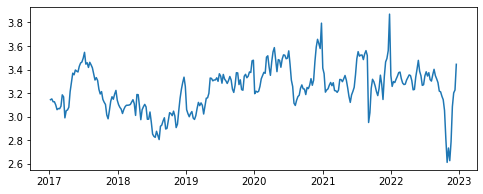

In [42]:
plt.figure(figsize=(8,3))
plt.plot(weekly_df['date'], weekly_df['swav'])
plt.show()

In [62]:
wei = pd.read_csv('economic_indicators/weekely_economic_index.csv')
wei['DATE'] = pd.to_datetime(wei['DATE'])

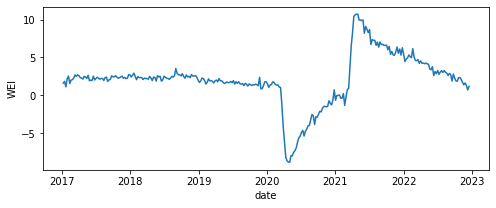

In [44]:
plt.figure(figsize=(8,3))
plt.xlabel('date')
plt.ylabel('WEI')
plt.plot(wei['DATE'], wei['WEI'])

In [45]:
x = wei[['WEI']]
x = sm.add_constant(x)
y = weekly_df[['swav']]

model = sm.OLS(y, x).fit()
print(model.summary())

valence_coef = model.params[1]

                            OLS Regression Results                            
Dep. Variable:                   swav   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     3.749
Date:                Sun, 08 Jan 2023   Prob (F-statistic):             0.0537
Time:                        22:29:47   Log-Likelihood:                 82.269
No. Observations:                 311   AIC:                            -160.5
Df Residuals:                     309   BIC:                            -153.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2553      0.013    259.965      0.0

In [66]:
weekly_df = weekly_df.reset_index()

In [71]:
weekly_df['sentiment'] = weekly_df['swav'] - (3.2553 - 0.0062 * wei['WEI'])
weekly_df

,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sum_streams,swav,sentiment
0,2017-01-07,384940815,279.231038,949.390,311946276,855.451,11.280673,7302,225.3140,-9517.583,790,198.6770,170871.758,5586,630.6255,76988163000,3.144942,-0.100376
1,2017-01-14,410773282,293.471370,952.022,311626643,855.516,12.490238,7152,228.0929,-9366.760,796,201.9687,170574.865,5589,623.5099,82154656400,3.151827,-0.092003
2,2017-01-21,418037694,286.572300,954.275,312386868,855.357,11.953475,7144,227.3506,-9326.943,821,206.8063,170833.969,5586,622.1665,83607538800,3.127761,-0.120595
3,2017-01-28,424685581,284.444880,959.625,311567929,862.577,10.831737,7071,226.3719,-9194.947,836,209.6582,171958.771,5589,622.3303,84937116200,3.127486,-0.114298
4,2017-02-04,446362951,281.055040,962.026,311786330,870.729,11.047911,7169,232.3076,-9059.388,822,207.7804,172172.503,5594,614.5745,89272590200,3.101041,-0.138449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,2022-11-19,617994365,397.403782,895.642,284675375,790.147,37.498638,7466,243.5480,-10811.892,920,153.1489,172032.978,5474,580.3573,123598873000,2.789971,-0.456711
307,2022-11-26,573363183,448.021998,877.840,278562800,775.465,34.562583,7494,245.3563,-11393.492,950,141.9617,172122.688,5462,623.6607,114672636600,3.086762,-0.158370
308,2022-12-03,653813179,467.521003,870.185,274863391,765.913,29.927898,7453,260.5827,-11654.945,969,136.8149,172821.159,5446,632.8238,130762635800,3.202609,-0.044631
309,2022-12-10,773068299,470.715726,863.650,273565410,773.829,26.274930,7345,274.1727,-11442.751,955,138.5295,172798.377,5427,632.0289,154613659800,3.227417,-0.023419


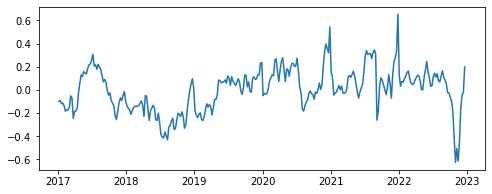

In [70]:
plt.figure(figsize=(8,3))
plt.plot(weekly_df['date'], weekly_df['sentiment'])
plt.show()

In [54]:
# weekly_df.set_index('date', inplace=True)
diff = weekly_df.diff()
diff = diff.drop('2017-01-07')
diff = diff.reset_index()
diff

,date,streams,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,sum_streams,swav
0,2017-01-14,25832467.0,14.240332,2.632,-319633.0,0.065,1.209565,-150.0,2.7789,150.823,6.0,3.2917,-296.893,3.0,-7.1156,5.166493e+09,0.006885
1,2017-01-21,7264412.0,-6.899070,2.253,760225.0,-0.159,-0.536763,-8.0,-0.7423,39.817,25.0,4.8376,259.104,-3.0,-1.3434,1.452882e+09,-0.024066
2,2017-01-28,6647887.0,-2.127420,5.350,-818939.0,7.220,-1.121738,-73.0,-0.9787,131.996,15.0,2.8519,1124.802,3.0,0.1638,1.329577e+09,-0.000275
3,2017-02-04,21677370.0,-3.389840,2.401,218401.0,8.152,0.216173,98.0,5.9357,135.559,-14.0,-1.8778,213.732,5.0,-7.7558,4.335474e+09,-0.026445
4,2017-02-11,248999.0,15.785332,-6.288,-611205.0,-3.110,-0.412113,55.0,0.0395,-40.946,-13.0,-1.6730,-750.615,-12.0,-9.6950,4.979980e+07,-0.040483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,2022-11-19,-82542911.0,7.114404,-8.275,978099.0,-12.898,-7.901856,-16.0,-1.2820,-150.957,17.0,-0.9619,298.294,-12.0,17.3540,-1.650858e+10,0.161798
306,2022-11-26,-44631182.0,50.618216,-17.802,-6112575.0,-14.682,-2.936055,28.0,1.8083,-581.600,30.0,-11.1872,89.710,-12.0,43.3034,-8.926236e+09,0.296791
307,2022-12-03,80449996.0,19.499004,-7.655,-3699409.0,-9.552,-4.634685,-41.0,15.2264,-261.453,19.0,-5.1468,698.471,-16.0,9.1631,1.609000e+10,0.115847
308,2022-12-10,119255120.0,3.194724,-6.535,-1297981.0,7.916,-3.652969,-108.0,13.5900,212.194,-14.0,1.7146,-22.782,-19.0,-0.7949,2.385102e+10,0.024808


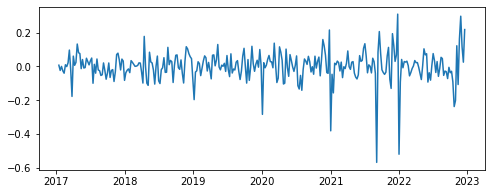

In [56]:
plt.figure(figsize=(8,3))
plt.plot(diff['date'], diff['swav'])
plt.show()

In [55]:
wei = wei.drop(0)
wei

,DATE,WEI
1,2017-01-14,1.85
2,2017-01-21,1.12
3,2017-01-28,2.18
4,2017-02-04,2.55
5,2017-02-11,1.56
...,...,...
306,2022-11-19,1.39
307,2022-11-26,1.64
308,2022-12-03,1.30
309,2022-12-10,0.72


In [73]:
x = weekly_df[['swav']]
x = sm.add_constant(x)
y = weekly_df[['sentiment']]
y = y.values.reshape(-1,1)

model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.988
Method:                 Least Squares   F-statistic:                 2.557e+04
Date:                Sun, 08 Jan 2023   Prob (F-statistic):          3.51e-299
Time:                        22:49:59   Log-Likelihood:                 770.83
No. Observations:                 311   AIC:                            -1538.
Df Residuals:                     309   BIC:                            -1530.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2035      0.020   -159.657      0.0